$\nabla J\left( \theta \right) =  \dfrac {2}{m} · \begin{bmatrix} \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_0 \\  \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_1 \\  \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_2 \\ ... \\  \sum ^{m}_{i=1}\left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_n \end{bmatrix}$  
梯度下降在更新一次theta向量时，对于每一个theta元素，要使所有的样本都参与一次矩阵运算(累加要从1取到m)，当样本数量大的时候，会影响效率

自然延伸：  
既然累加之后还要取平均，可以尝试不累加，也不平均，每次只取一个（还是挺难自然延伸的，找不到还有这样操作的例子）  $2 · \begin{bmatrix} \left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_0 \\ \left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_1 \\  \left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_2 \\ ... \\  \left( x^{(i)}_b\theta -y^{(i)}\right)·x^{(i)}_n \end{bmatrix} = 2 · （X^{(i)}_b）^T·（X^{(i)}_b\theta-y^{(i)}）$  

上式代替梯度，成为theta更新的方向。每次更新一个theta的元素，只需要随机取X中的一行。这个方向向量不再是梯度，也就是说不再是损失下降最快的方向。由下图可以看到，theta探索的方向是来来回回的，每一次探索甚至不一定能保证是损失函数减小的方向。  
这个i，是整个theta向量的i，也就是说每次更新theta向量，只取一个样本。

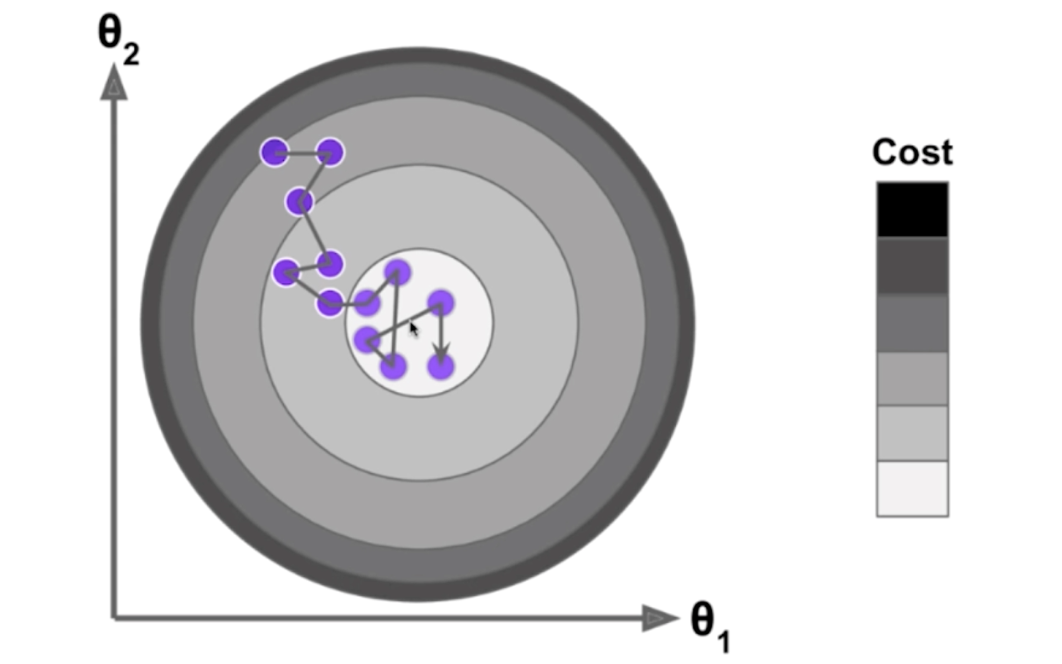

实际使用时，步长的选择不能是一个固定值。在接近极小值时，探索方向的随意性可能会使得theta取不到极小值。所以越接近极小值，步长应该越小。换言之，步长和迭代次数要成反比  
于是最简单的，可以令$\eta = \dfrac {1}{i\_iter}$

但是这样又存在一个问题，就是当i_iter从1变成2时，步长直接少了一半，太快了。所以可以调整公式，在分母上增加一个常数b来缓解最开始的时候，步长变化太快的问题,$\eta = \dfrac {1}{i\_iter + b}$，b通常取50

有时候，分子取1效果也不好（这个可能就是调参得出的结论），一般分子取5。  
$\eta = \dfrac {a}{i\_iter + b}$  
于是步长也有了超参数a和b

这种逐渐递减的思想，来自于模拟退火思想

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
m = 100000
#只有一个特征
x = np.random.normal(size = m)
X = x.reshape(-1, 1)
y = 4. *x +3. +np.random.normal(0, 3, size = m)

使用梯度下降

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y- X_b.dot(theta)) ** 2) /len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(y)
    

def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    cur_iter = 0
         
    while cur_iter < n_iters :
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
       
        if(abs(J(theta, X_b, y) -J(last_theta, X_b, y) ) < epsilon):  
       
            break        
        
        cur_iter += 1
    return theta

In [7]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

CPU times: user 2.01 s, sys: 67.9 ms, total: 2.08 s
Wall time: 555 ms


In [8]:
theta

array([2.99883277, 3.98277772])

### 使用SGD

In [9]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2 

In [11]:
def sgd(X_b, y, initial_theta, n_iters):
    #不需要手动设置eta
    t0 = 5  #也就是a
    t1 = 50  #也就是b
    
    def learning_rate(t):
        return t0/(t + t1)
    
    theta = initial_theta
    #gd中，搜索退出的条件有两个，一个是迭代次数达到上限，一个是前后两次损失差小于一个很小的值。
    #但是在sgd中，因为每次搜索都是随机的，所以前后两次损失差小于一个很小的值也不一定就是找到了极小值
    #所以只有一个搜索次数的退出条件
    #因为不需要计算前后两次的损失差，所以J()函数也不用了
    for cur_iter in range(n_iters) :
        #随机选择一个样本
        rand_i = np.random.randint(len(X_b))
        
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    return theta
    

In [13]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta,n_iters=len(X_b)//3)
#n_iters=len(X_b)//3 只随机使用了样本总数的三分之一的数量,就可以得出和gd差不多的结果

CPU times: user 1.03 s, sys: 18.6 ms, total: 1.05 s
Wall time: 1.06 s


In [14]:
theta

array([3.0542885 , 4.03049171])

In [15]:
theta = sgd(X_b, y, initial_theta,n_iters=len(X_b))

In [16]:
theta

array([3.03100211, 4.02130835])